In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
sns.set_theme(style='darkgrid')

## Load data

In [282]:
df = pd.read_csv('./Automobile_data.csv')

In [283]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


## Data Preprocessing

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [285]:
df.shape

(205, 26)

In [286]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


###  Identify missing values

In [287]:
# replace ? with nan
df.replace('?', np.nan, inplace=True)

In [288]:
df['make'].isnull().value_counts()

make
False    205
Name: count, dtype: int64

In [289]:
# count each columns nan value
for i in df.columns:
    counter = df[i].isnull().value_counts()
    print(counter)
    print('***' * 30)
    

symboling
False    205
Name: count, dtype: int64
******************************************************************************************
normalized-losses
False    164
True      41
Name: count, dtype: int64
******************************************************************************************
make
False    205
Name: count, dtype: int64
******************************************************************************************
fuel-type
False    205
Name: count, dtype: int64
******************************************************************************************
aspiration
False    205
Name: count, dtype: int64
******************************************************************************************
num-of-doors
False    203
True       2
Name: count, dtype: int64
******************************************************************************************
body-style
False    205
Name: count, dtype: int64
*****************************************************************************

### deal with null value

In [290]:
# normalized loses null value
MeanOfNormalized = df['normalized-losses'].astype('float').mean()
df['normalized-losses'].replace(np.nan, MeanOfNormalized, inplace=True)

In [291]:
# stroke null value
MeanOfStroke = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, MeanOfStroke, inplace=True)

In [292]:
# bore null value
MeanOfBore = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, MeanOfBore, inplace=True)

In [293]:
# peak_rpm null value
MeanOfPeak_rpm = df['peak-rpm'].astype('float').mean()
df['peak-rpm'].replace(np.nan, MeanOfPeak_rpm, inplace=True)

In [294]:
# horsepower null value
MeanOfHorsepower = df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.nan, MeanOfHorsepower, inplace=True)

In [295]:
# num-of-doors null value
ModeOfDoors = df['num-of-doors'].mode()[0]
df['num-of-doors'].replace(np.nan, ModeOfDoors, inplace=True)

In [296]:
# price null value
df.dropna(subset=['price'], axis=0, inplace=True)

# reset_index
df.reset_index(drop=True, inplace=True) 

## Correct Data Type

In [297]:
# check format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [298]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [299]:
df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].astype('float')

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## Standard Data

In [301]:
# transform mpg to L/100km
df['city-mpg'] = 235.215 / df['city-mpg']
df['highway-mpg'] = 235.215 / df['highway-mpg']

In [302]:
# rename transfored data
df.rename(columns={'city-mpg': 'city_L/100km', 'highway-mpg': 'highway_L/100km'}, inplace=True)

## Exploratory Data Analysis

### Categorical Data

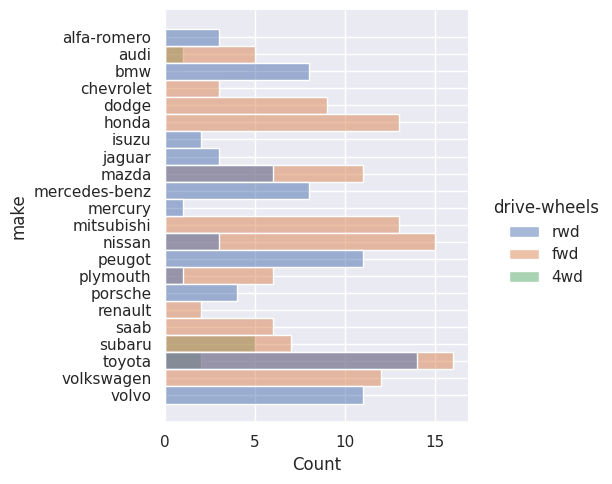

In [303]:
sns.displot(
    data=df,
    y='make',
    hue='drive-wheels',
)

<Axes: ylabel='count'>

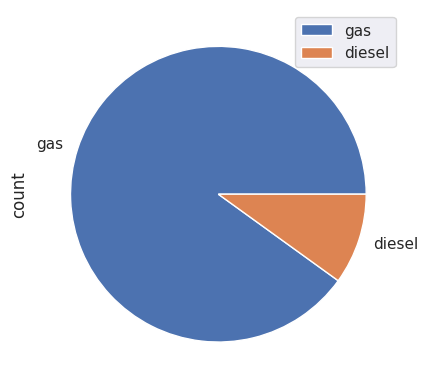

In [304]:
fuel = pd.DataFrame(df['fuel-type'].value_counts())
fuel.plot.pie(y='count')

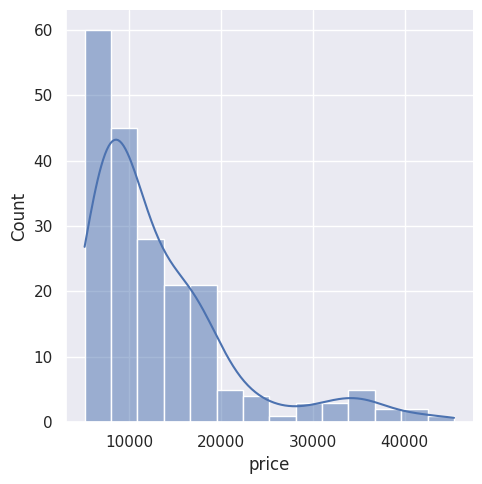

In [305]:
sns.displot(data=df, x='price', kde=True);

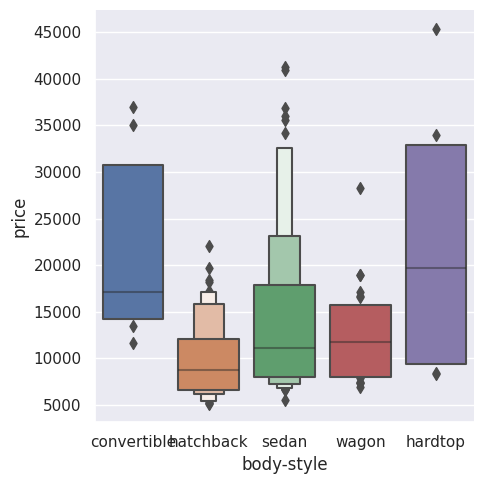

In [306]:
sns.catplot(data=df, x='body-style', y='price', kind='boxen')

In [307]:
price = df.groupby('make')['price'].mean()

In [308]:
price = price.reset_index()

In [309]:
price.sort_values('price', inplace=True)

<Axes: xlabel='price', ylabel='make'>

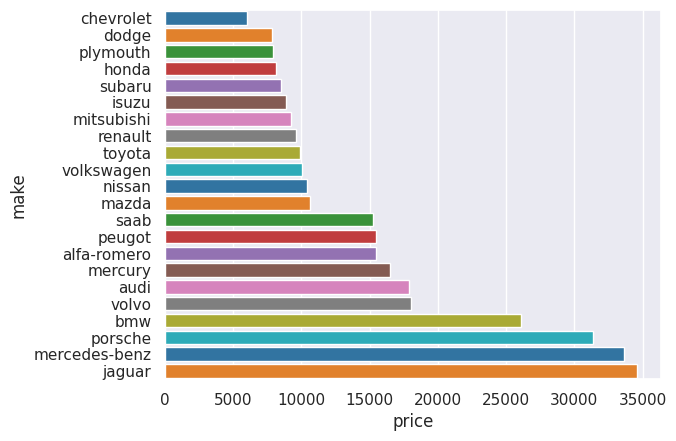

In [310]:
sns.barplot(
    data=price,
    y='make',
    x='price',
    palette='tab10',
)

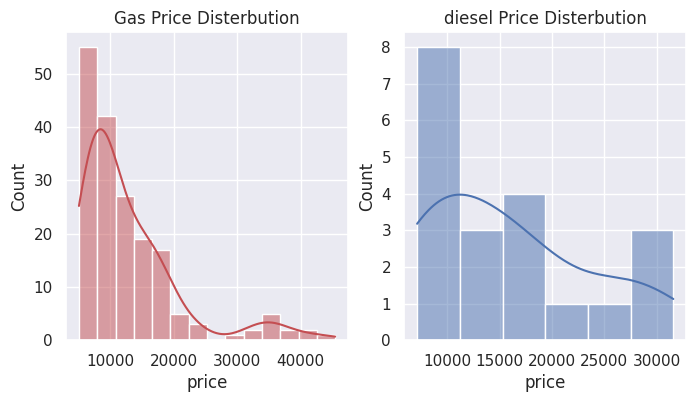

In [311]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(
    x=df[(df['fuel-type'] == 'gas')]['price'],
    ax=ax[0],
    kde=True,
    color='r'
);
ax[0].set_title('Gas Price Disterbution')
ax[1].set_title('diesel Price Disterbution')

sns.histplot(
    x=df[(df['fuel-type'] == 'diesel')]['price'],
    ax=ax[1],
    kde=True
);

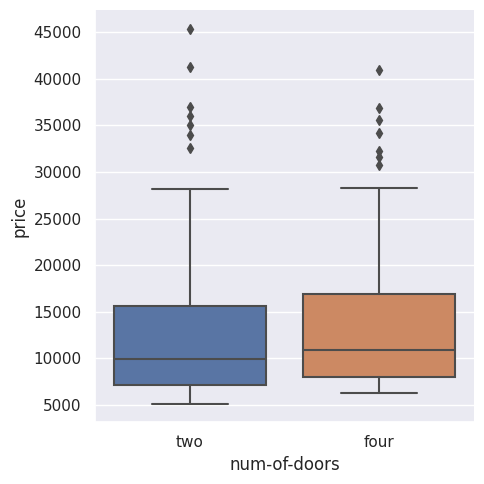

In [312]:
sns.catplot(
    data=df,
    y='price',
    x='num-of-doors',
    kind='box'
)

In [313]:
counter = df['body-style'].value_counts()
counter = pd.DataFrame(counter)

<Axes: ylabel='count'>

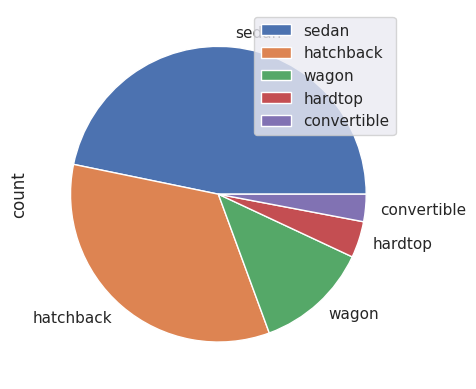

In [314]:
counter.plot.pie(y='count')

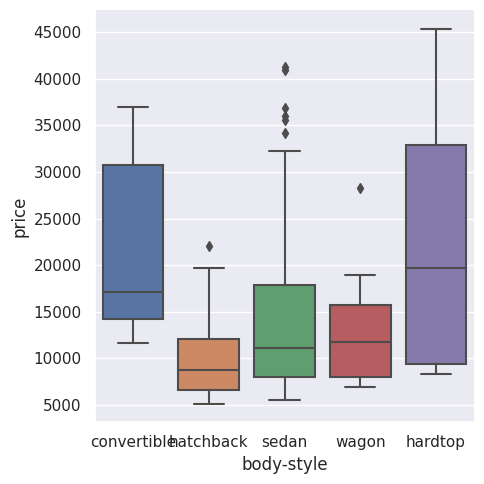

In [315]:
sns.catplot(
    data=df,
    y='price',
    x='body-style',
    kind='box',
);

In [316]:
drive_wheel_count = df['drive-wheels'].value_counts()
drive_wheel_count = pd.DataFrame(drive_wheel_count)

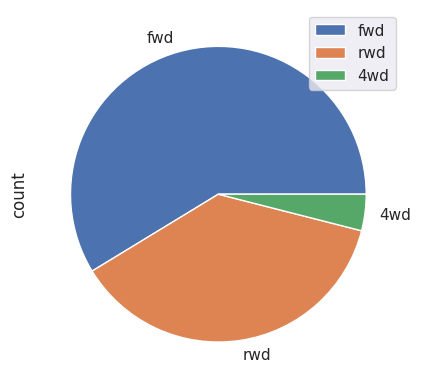

In [317]:
drive_wheel_count.plot.pie(y='count');

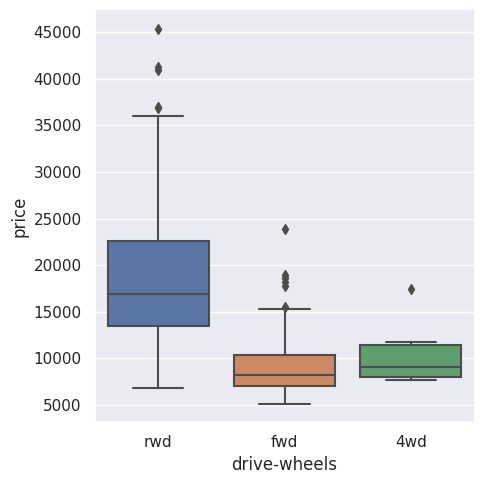

In [318]:
sns.catplot(
    data=df,
    y='price',
    x='drive-wheels',
    kind='box'
);

In [319]:
engin_loc_count = df['engine-location'].value_counts()
engin_loc_count = pd.DataFrame(engin_loc_count)

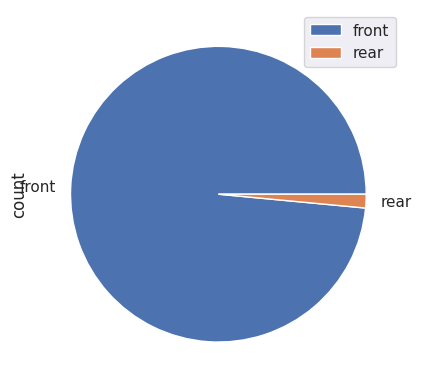

In [320]:
engin_loc_count.plot.pie(y='count');

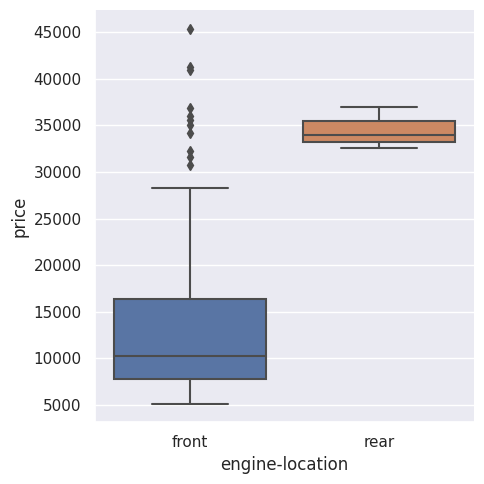

In [321]:
sns.catplot(
    data=df,
    x='engine-location',
    y='price',
    kind='box'
);

### Nummerical Data

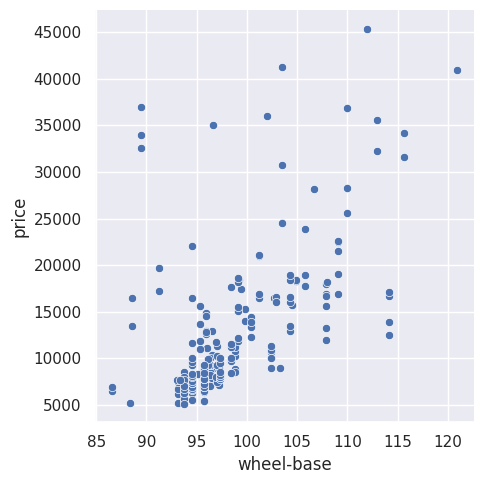

In [322]:
sns.relplot(
    data=df,
    x='wheel-base',
    y='price',
    kind='scatter'
);

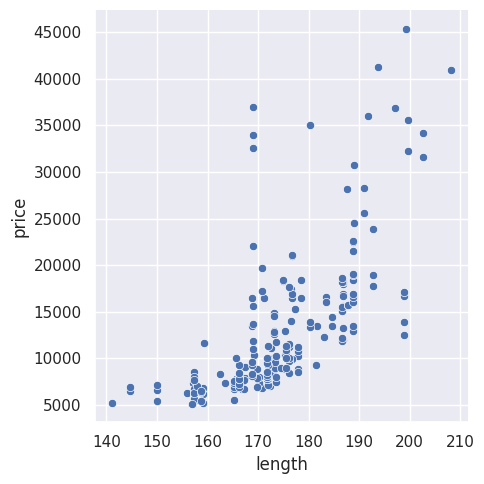

In [323]:
sns.relplot(
    data=df,
    x='length',
    y='price',
    kind='scatter'
);

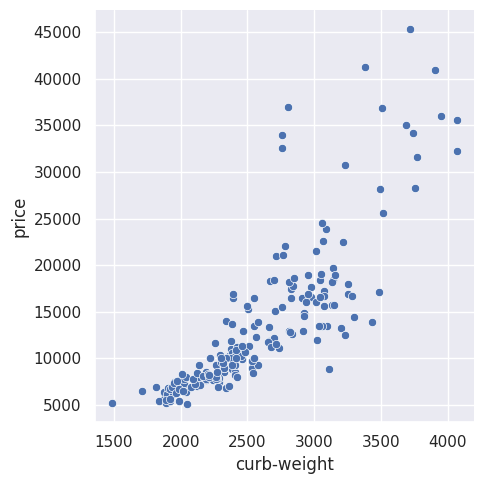

In [324]:
sns.relplot(
    data=df,
    x='curb-weight',
    y='price'
);

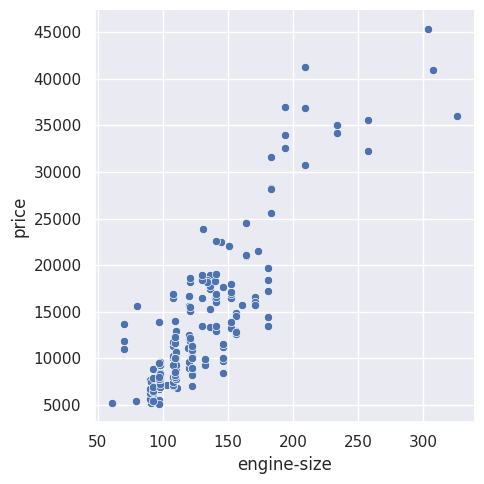

In [325]:
sns.relplot(
    data=df,
    x='engine-size',
    y='price'
);

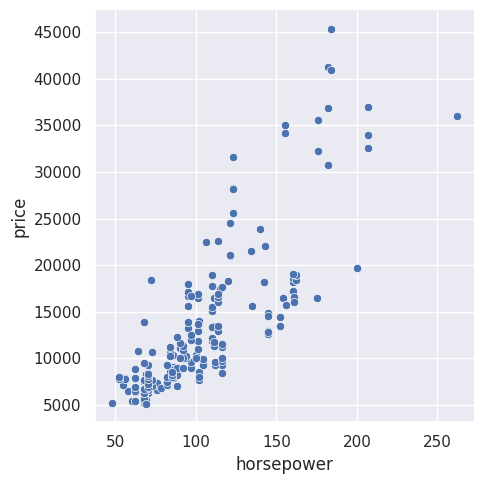

In [326]:
sns.relplot(
    data=df,
    x='horsepower',
    y='price'
);

## Feature Selection

### 1- Categorical 

In [327]:
categorical_col = df.select_dtypes(include=['object'])

In [328]:
categorical_col.drop(columns=['make'], inplace=True)

In [329]:
categorical_col.describe()

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201
unique,2,2,2,5,3,2,6,7,8
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,181,165,115,94,118,198,145,157,92


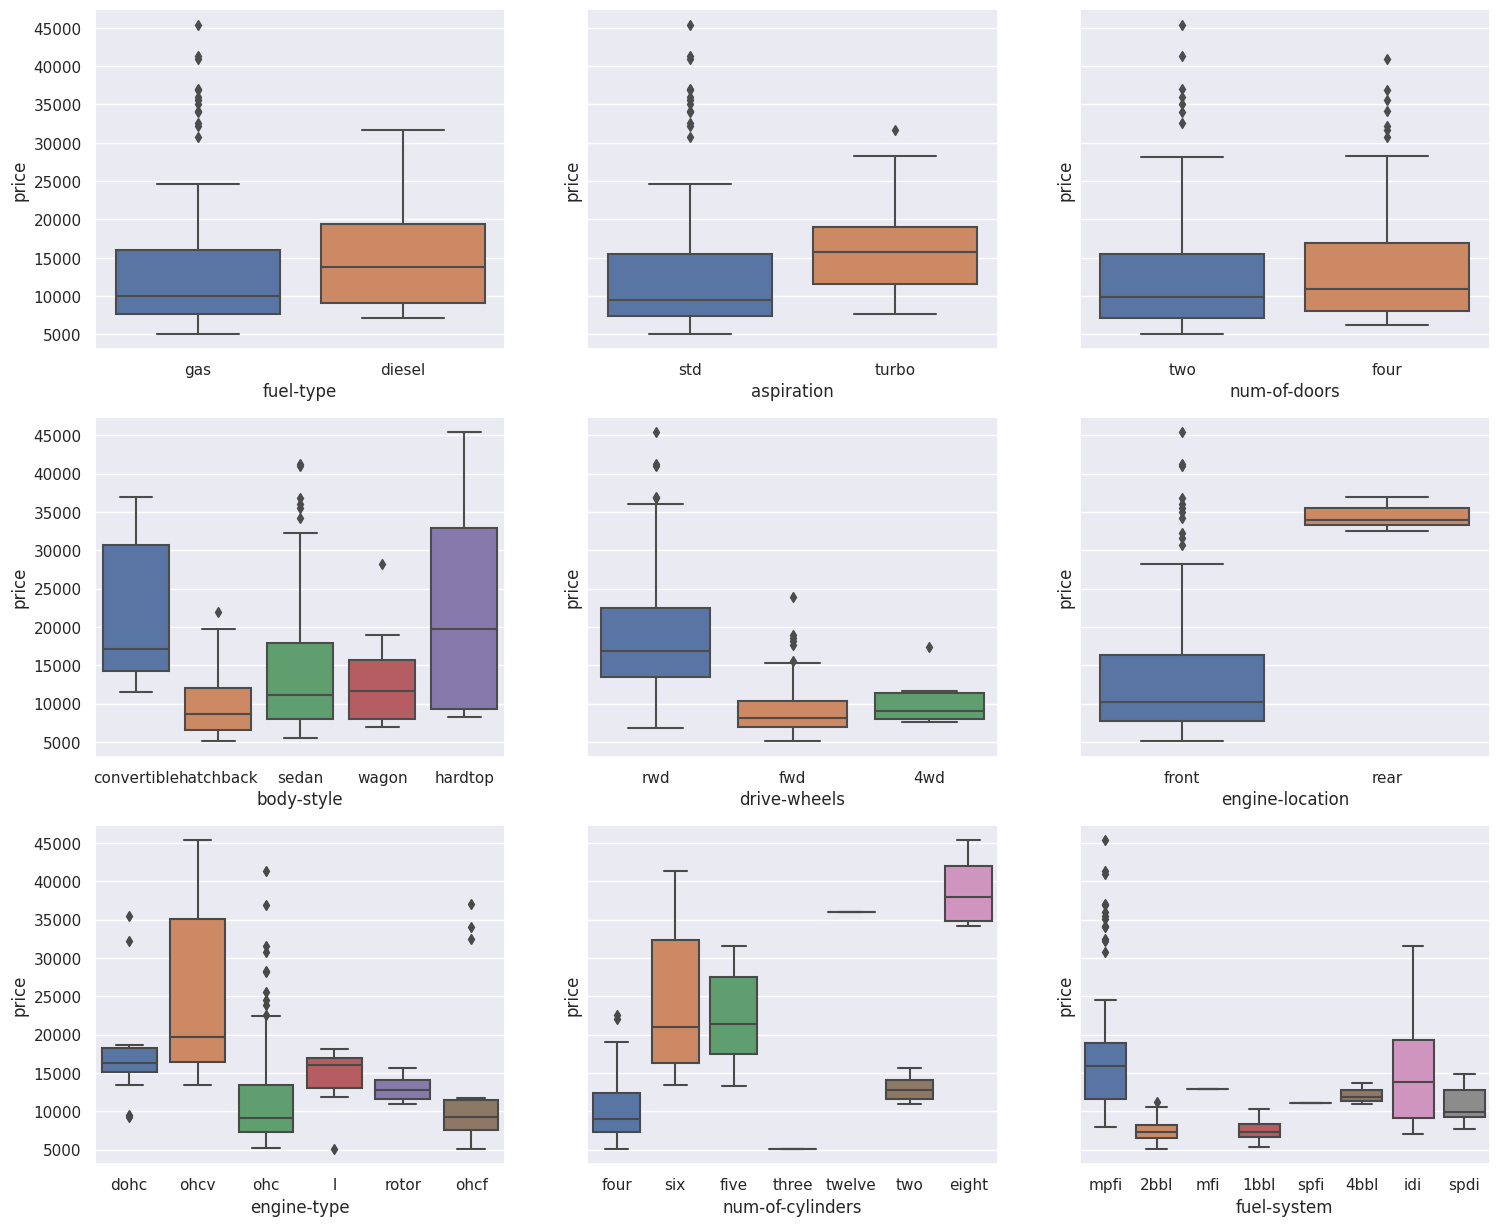

In [330]:
fig, ax = plt.subplots(3, 3, figsize=(18, 15), sharey=True)
for i, j in list(enumerate(categorical_col)):
    x,y = i//3,i%3
    sns.boxplot(
        data=categorical_col,
        y=df['price'],
        x=j,
        ax=ax[x][y],
    )

'drive-wheels', 'fuel-type' and 'aspiration' has good relation with price

### 2-Numerical

In [331]:
numerical_col = df.select_dtypes(exclude='object')

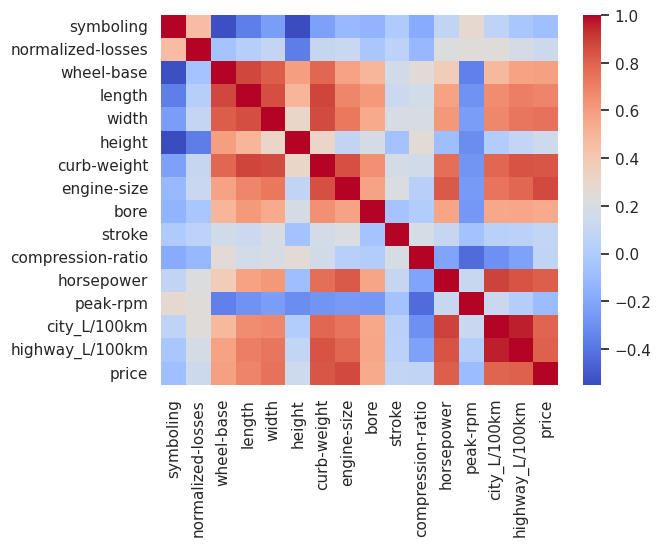

In [332]:
sns.heatmap(
    numerical_col.corr(),
    cmap='coolwarm'
);

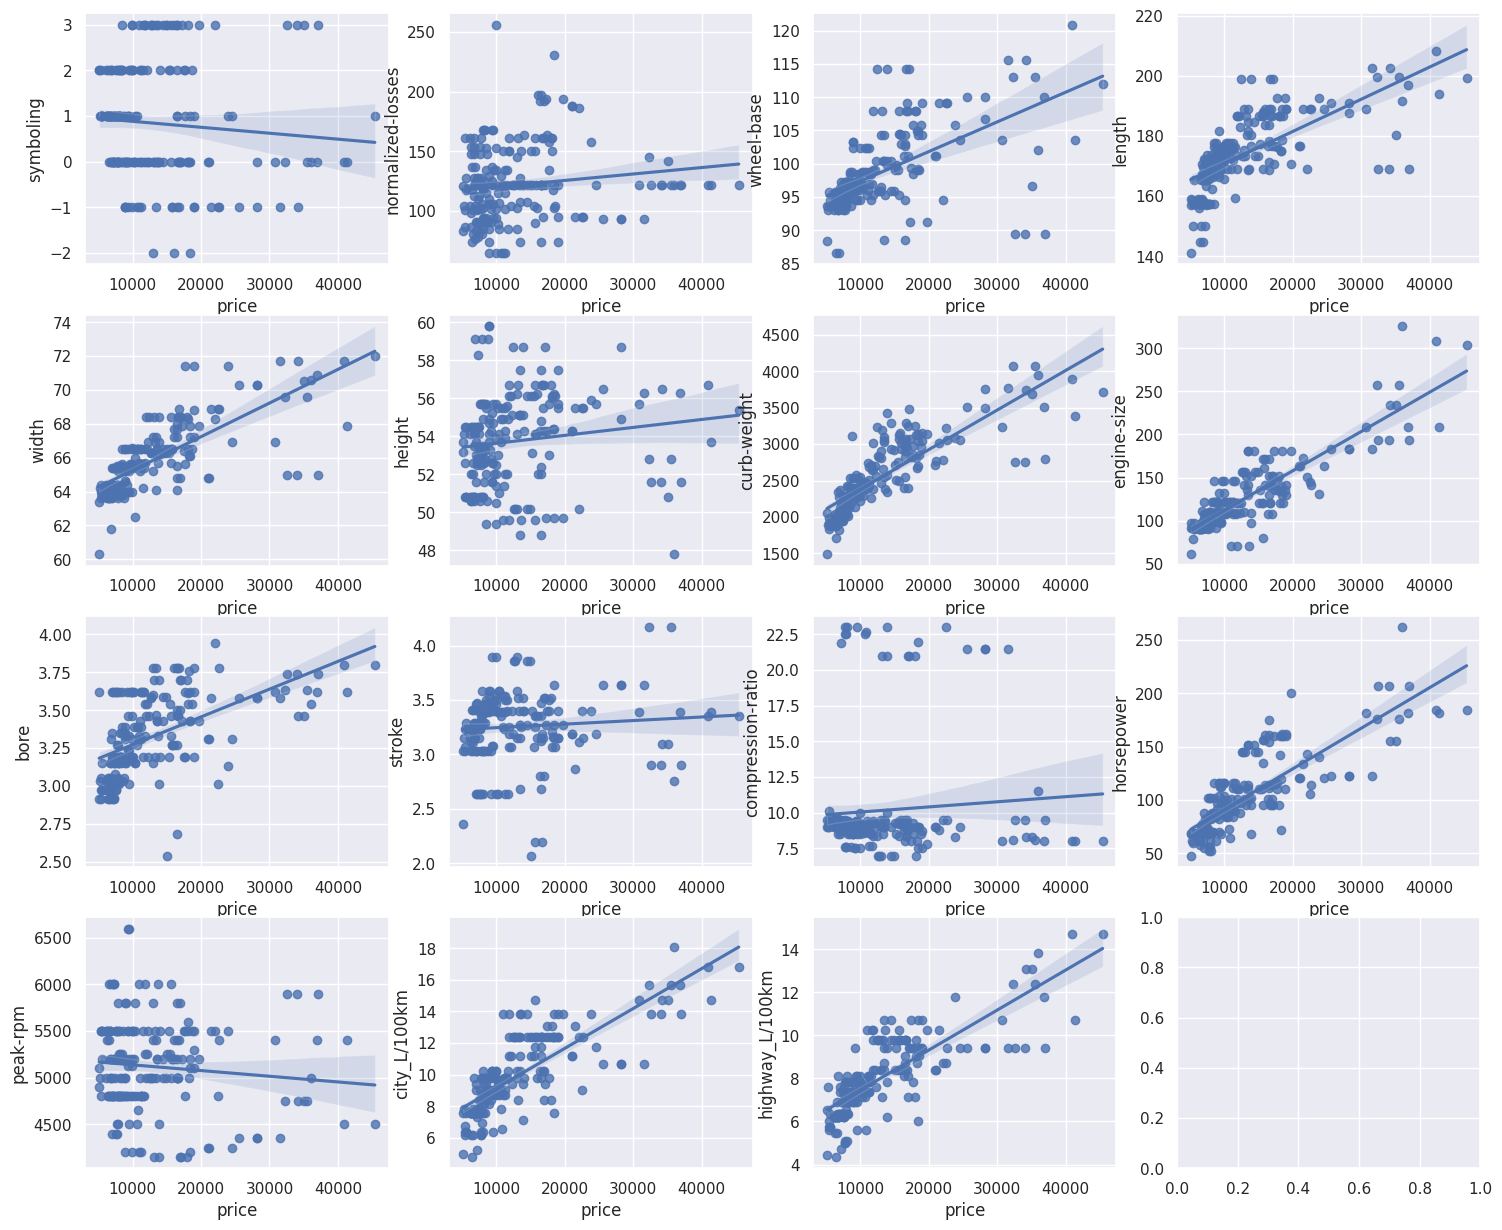

In [333]:
fig, ax = plt.subplots(4, 4, figsize=(18, 15))
for i, j in list(enumerate(numerical_col.columns[:-1])):
    x, y = i // 4, i % 4
    sns.regplot(
        data=numerical_col,
        x='price',
        y=j,
        ax=ax[x][y]
    )

wheel-base, length, width, curb-weights, engine-size, horspower, city/100km and highway/100km has a strong relation with priceine.line.se
Bore

## Conclusion

as we saw most important feature in numeric data is:
Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-ba

and in catagorical data is:
fuel-type
aspiration
Drive-whee

now we can build our machine learning model with this variabales
se
Bore


## Model Development

In [334]:
X = df[['fuel-type', 'aspiration', 'drive-wheels', 'length', 'width', 'curb-weight', 'engine-size', 'horsepower',
       'city_L/100km', 'highway_L/100km', 'wheel-base', 'bore']].copy()

In [335]:
X['fuel-type'].replace({'gas': 0, 'diesel': 1}, inplace=True)
X['aspiration'].replace({'std': 0, 'turbo': 1}, inplace=True)
X['drive-wheels'].replace({'rwd': 0, 'fwd': 1, '4wd': 2}, inplace=True)

In [336]:
 y = df['price']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [338]:
lre = LinearRegression()

In [339]:
lre.fit(X_train, y_train)

LinearRegression()

In [340]:
y_predict = lre.predict(X_test)

In [341]:
mse = mean_squared_error(y_test, y_predict)
print(f'mean squared error is {mse}')

mean squared error is 8834584.673248114


In [342]:
r2 = r2_score(y_test, y_predict)
print(f'R2 score is {r2}')

R2 score is 0.8347943595542675


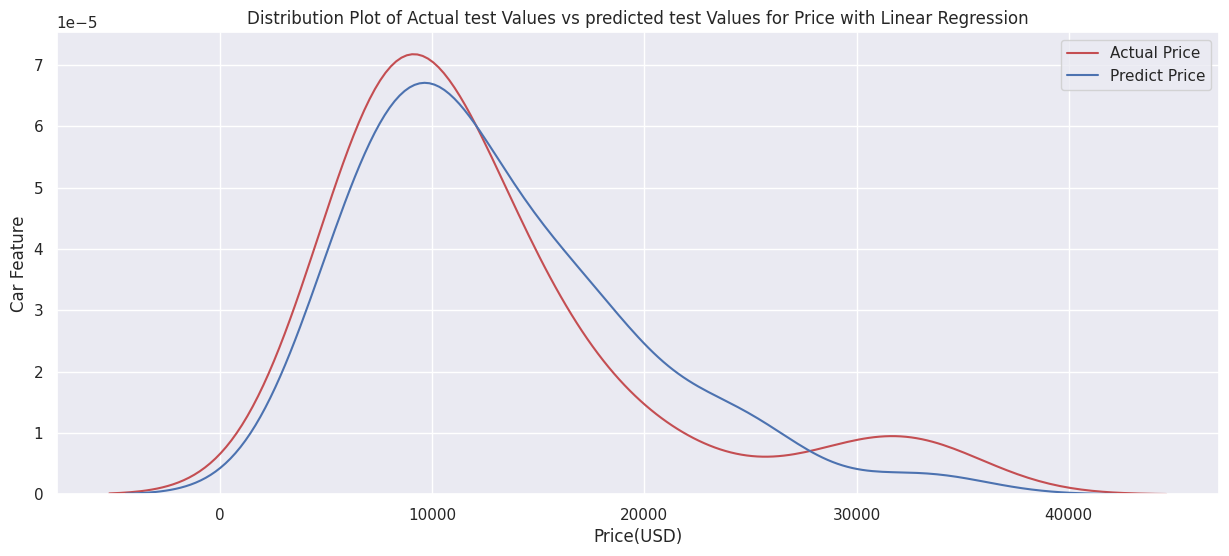

In [343]:
plt.figure(figsize=(15, 6));
ax1 = sns.kdeplot(y_test, label='Actual Price', color='r')
sns.kdeplot(y_predict, label='Predict Price', color='b', ax=ax1)
plt.title('Distribution Plot of Actual test Values vs predicted test Values for Price with Linear Regression');
plt.xlabel('Price(USD)');
plt.ylabel('Car Feature');
ax1.legend();

### Random Forest

In [344]:
rf = RandomForestRegressor(n_estimators=15, criterion='squared_error', random_state=20, n_jobs=-1)

In [345]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, n_jobs=-1, random_state=20)

In [346]:
y_rf_predict = rf.predict(X_test)

In [347]:
mse = mean_squared_error(y_test, y_rf_predict)
print(f'mean squared error is {mse}')

mean squared error is 4180602.458081904


In [348]:
r2 = r2_score(y_test, y_rf_predict)
print(f'R2 score is {r2}')

R2 score is 0.9218232512244973


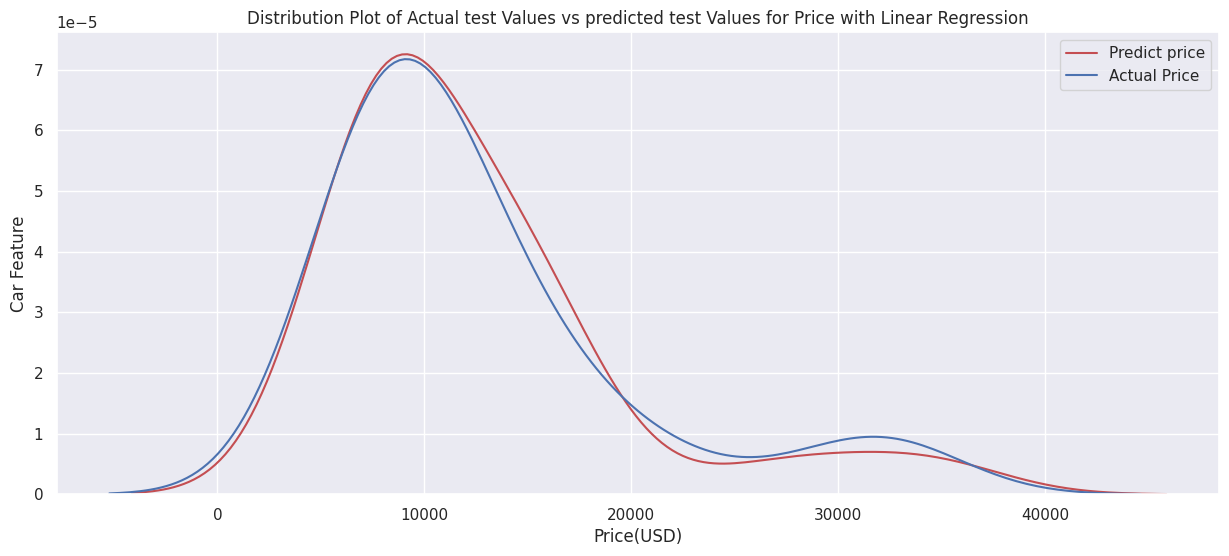

In [349]:
plt.figure(figsize=(15, 6))
ax2 = sns.kdeplot(y_rf_predict, label='Predict price', color='r')
sns.kdeplot(y_test, label='Actual Price', color='b', ax=ax2);
plt.title('Distribution Plot of Actual test Values vs predicted test Values for Price with Linear Regression');
plt.xlabel('Price(USD)');
plt.ylabel('Car Feature');
ax2.legend()

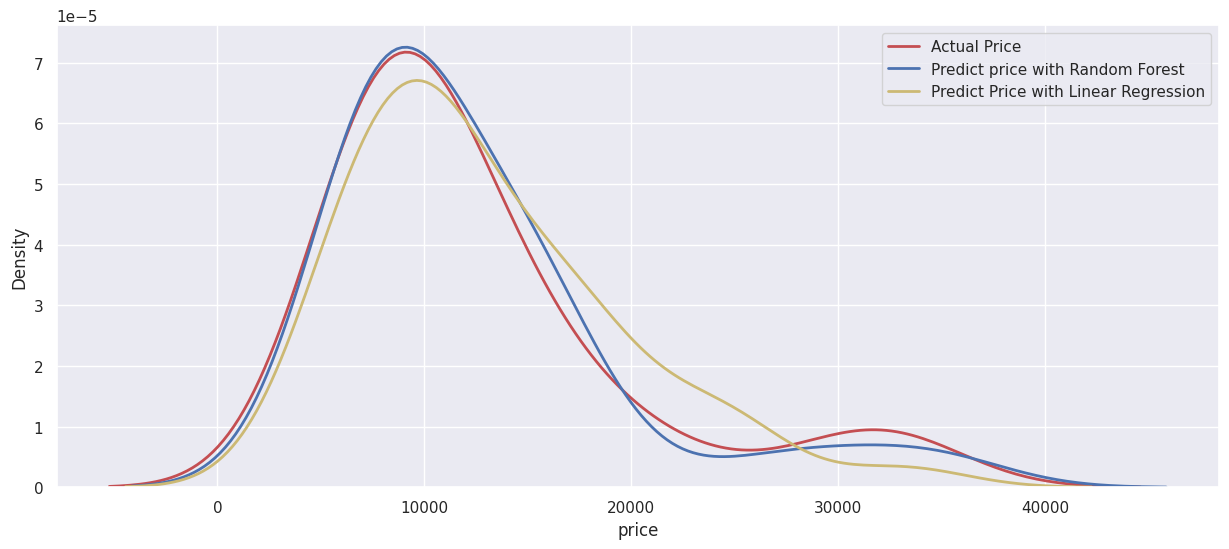

In [350]:
plt.figure(figsize=(15, 6))
ax3 = sns.kdeplot(y_test, label='Actual Price', color='r', lw=2)
sns.kdeplot(y_rf_predict, label='Predict price with Random Forest', color='b', ax=ax3, lw=2)
sns.kdeplot(y_predict, label='Predict Price with Linear Regression', color='y', ax=ax3, lw=2)
ax3.legend();